# Setup

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import tseries
from datetime import datetime
from datetime import timedelta
import seaborn as sns

import reporterFun as rf

reporter, dayReporter, sleepReporter, wakeReporter = rf.GetReporterData()

Int64Index([   8,   21,   37,   56,   72,   89,  107,  125,  142,  168,  175,
             187,  204,  223,  239,  254,  268,  299,  323,  339,  358,  375,
             393,  411,  427,  459,  491,  506,  522,  542,  561,  590,  601,
             618,  636,  651,  697,  714,  730,  749,  783,  801,  811,  824,
             842,  852,  854,  869,  884,  902,  938,  955,  972, 1036, 1058,
            1078, 1098, 1119, 1134, 1151, 1169, 1182, 1196, 1200, 1221, 1240],
           dtype='int64')
Int64Index([   9,   22,   38,   57,   73,   90,  108,  126,  143,  169,  176,
             188,  205,  224,  240,  255,  269,  300,  324,  340,  359,  376,
             394,  412,  428,  460,  492,  507,  523,  543,  562,  602,  619,
             637,  652,  698,  715,  731,  750,  784,  802,  812,  825,  843,
             853,  855,  870,  885,  903,  939,  956,  973, 1037, 1059, 1079,
            1099, 1120, 1135, 1152, 1170, 1183, 1197, 1201, 1222, 1241],
           dtype='int64')
590
Int64Index([

reporterFun.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sleepSeries.drop(sleepSeries.index[i], inplace=True)


# Analyse Sleeping Patterns

['Great' 'Had Trouble Falling Asleep' 'Not at all' 'Ok' 'Poorly'
 'Woke Up During Night']


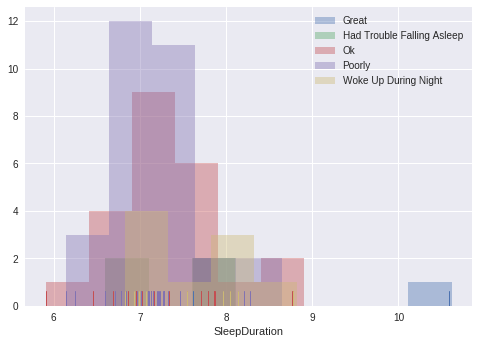

In [3]:
rf.displaySleepDuration(reporter)

How do my energy levels vary over time?

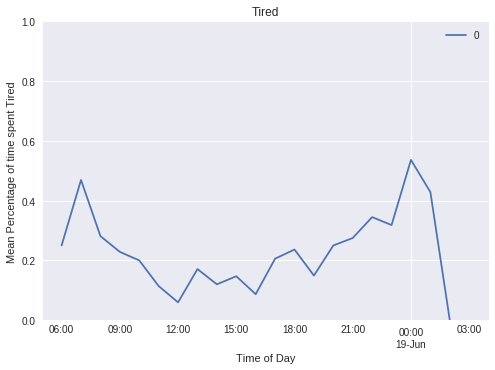

In [4]:
rf.displayToken(reporter, 'Mood', 'Tired', display='Time')

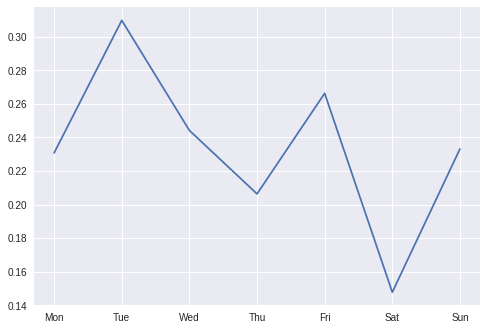

In [5]:
rf.displayToken(reporter, 'Mood', 'Tired', display='Day')

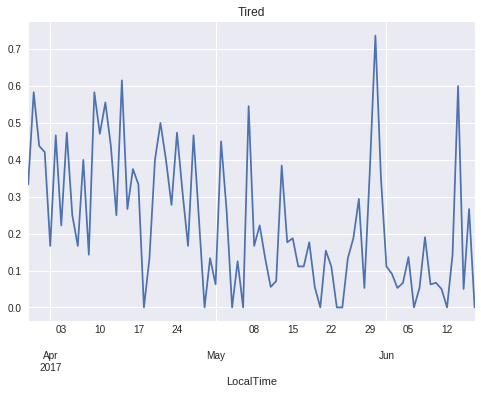

In [6]:
rf.displayToken(reporter, 'Mood', 'Tired', display='Date');
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
#rf.displayToken(reporter, 'Mood', 'Tired', display='Time', ax=ax1)
#rf.displayToken(reporter, 'Mood', 'Tired', display='Date', ax=ax2)

Amount tired per day vs. sleep quality.

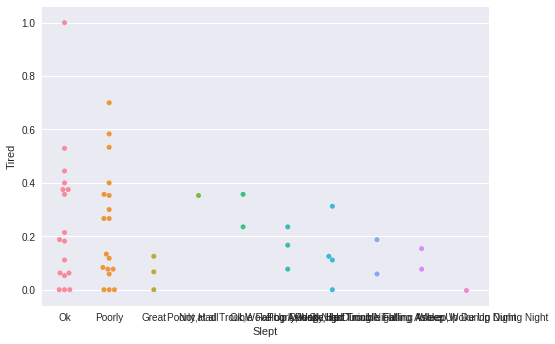

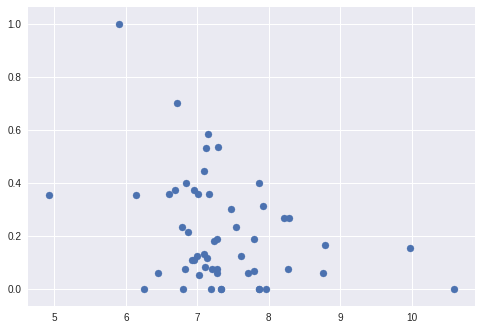

In [7]:
# Get Amount Tired
dataf = rf.tokenDailyResampled(dayReporter, 'Mood', 'Tired', sampleType='mean')

# Get Sleep Duration in Hours
wake = wakeReporter.copy()
wake.index = wake['LocalTime']
wake.index = wake.index.date + pd.DateOffset(hours = 5)
wake.loc[:, 'SleepDuration'] = wake['SleepDuration'].dt.seconds/60.0/60.0

# Merge, and Remove Days Which Are Not Consecutive 
wake = wake.merge(dataf, how='inner', right_index=True, left_index=True)
wake = wake[rf.getIdxTimeDifference(wake) == timedelta(days=1)]
sns.swarmplot(x=wake['Slept'], y=wake['Tired'])

sns.plt.figure()
sns.plt.scatter(x=wake['SleepDuration'], y=wake['Tired'])

Tired vs. Sleep *the day before*

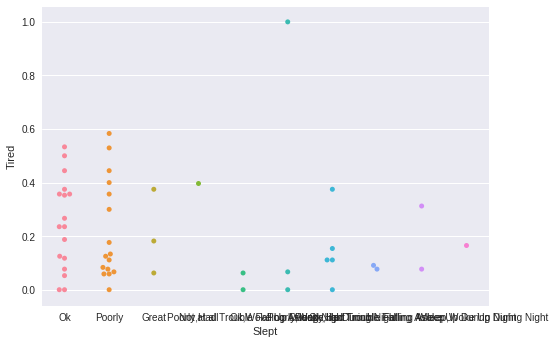

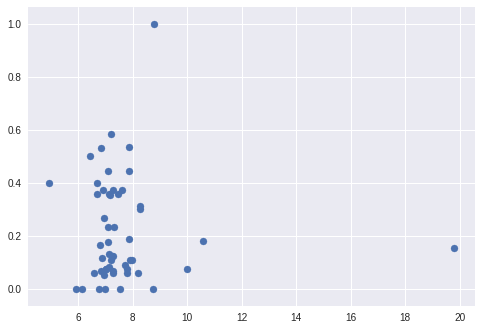

In [9]:
# Get amount tired, label it as being one day earlier
# Therefore comparing 'Slept' from today with 'Tired' tomorrow 
dataf = rf.tokenDailyResampled(dayReporter, 'Mood', 'Tired', sampleType = 'mean')
dataf.index = dataf.index - pd.DateOffset(days = 1)

wake = wakeReporter.copy()
wake.index = wake['LocalTime']
wake.index = wake.index.date + pd.DateOffset(hours = 5)
wake.loc[:, 'SleepDuration'] = wake['SleepDuration'].dt.seconds/60.0/60.0

# Merge, and Remove Days Which Are Not Consecutive 
wake = wake.merge(dataf, how='inner', right_index=True, left_index=True)
wake = wake[rf.getIdxTimeDifference(wake) == timedelta(days=1)]
sns.swarmplot(x=wake['Slept'], y=wake['Tired'])

sns.plt.figure()
sns.plt.scatter(x=wake['SleepDuration'], y=wake['Tired'])

Linear regression: tired vs sleep time:

In [ ]:
trainReporter, testReporter = sklearn.model_selection.train_test_split(dayReporter, test_size =0.2)
model1 = sklearn.linear_model.LinearRegression()

my_features = tmp['SleepDuration']
my_target = tmp['Tired']
model1.fit(tmp['SleepDuration'], tmp['Tired'])